### Q. 정류장 별 나가고 들어오는 자전거 수가 비슷한지?

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
journeys = pd.read_csv('journeys.csv')
stations = pd.read_csv('stations.csv')

print(journeys.shape)
print(stations.shape)

journeys.head(2)

(1542844, 14)
(773, 5)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550


In [28]:
stations.head(2)

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"


In [29]:
# 끝 정류장에 대한 정보를 journeys에 추가
data = pd.merge(journeys, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 End Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# 시작 정류장에 대한 정보도 추가해야되기 때문에 Column값 변경
data.rename(columns={"Capacity":"End Capacity", "Latitude":"End Latitude", "Longitude":"End Longitude", "Station Name":"End Station Name"},inplace = True)

# 시작 정류장에 대한 정보를 journeys에 추가
data = pd.merge(data, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 Start Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# Column값 변경
data.rename(columns={"Capacity":"Start Capacity", "Latitude":"Start Latitude", "Longitude":"Start Longitude", "Station Name":"Start Station Name"},inplace = True)

# 최종 데이터
print(data.shape)
data.head(2)

(1542844, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
0,2040.0,953,19,9,17,18,0,478,19,9,...,26,251,21.0,51.521889,-0.046670,"Stepney Green Station, Stepney",34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street"
1,1800.0,12581,19,9,17,15,21,122,19,9,...,51,550,23.0,51.521113,-0.078869,"Norton Folgate, Liverpool Street",23.0,51.521564,-0.039264,"Harford Street, Mile End"


In [30]:
# 정류장별 나가는 수
pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
Start Station ID,
1,1269
2,2055
3,3337
4,1405
5,3335


In [31]:
# 정류장별 들어오는 수
pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
End Station ID,
1,877
2,2379
3,3786
4,1548
5,3596


In [44]:
# 정류장별 나가는 수 - 정류장별 들어오는 수
data_1 = pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count') - pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')
data_1 = data_1.rename(columns = {'Journey Duration' : 'Number of bicycles'})
data_1.head()

,Number of bicycles
Start Station ID,
1,392
2,-324
3,-449
4,-143
5,-261


In [45]:
data_1.describe()

,Number of bicycles
count,779.000000
mean,0.000000
std,294.470925
min,-3186.000000
25%,-59.000000
50%,12.000000
75%,93.000000
max,2005.000000


In [47]:
result = pd.merge(data_1, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')
result.to_csv('result.csv')

In [48]:
result.plot()

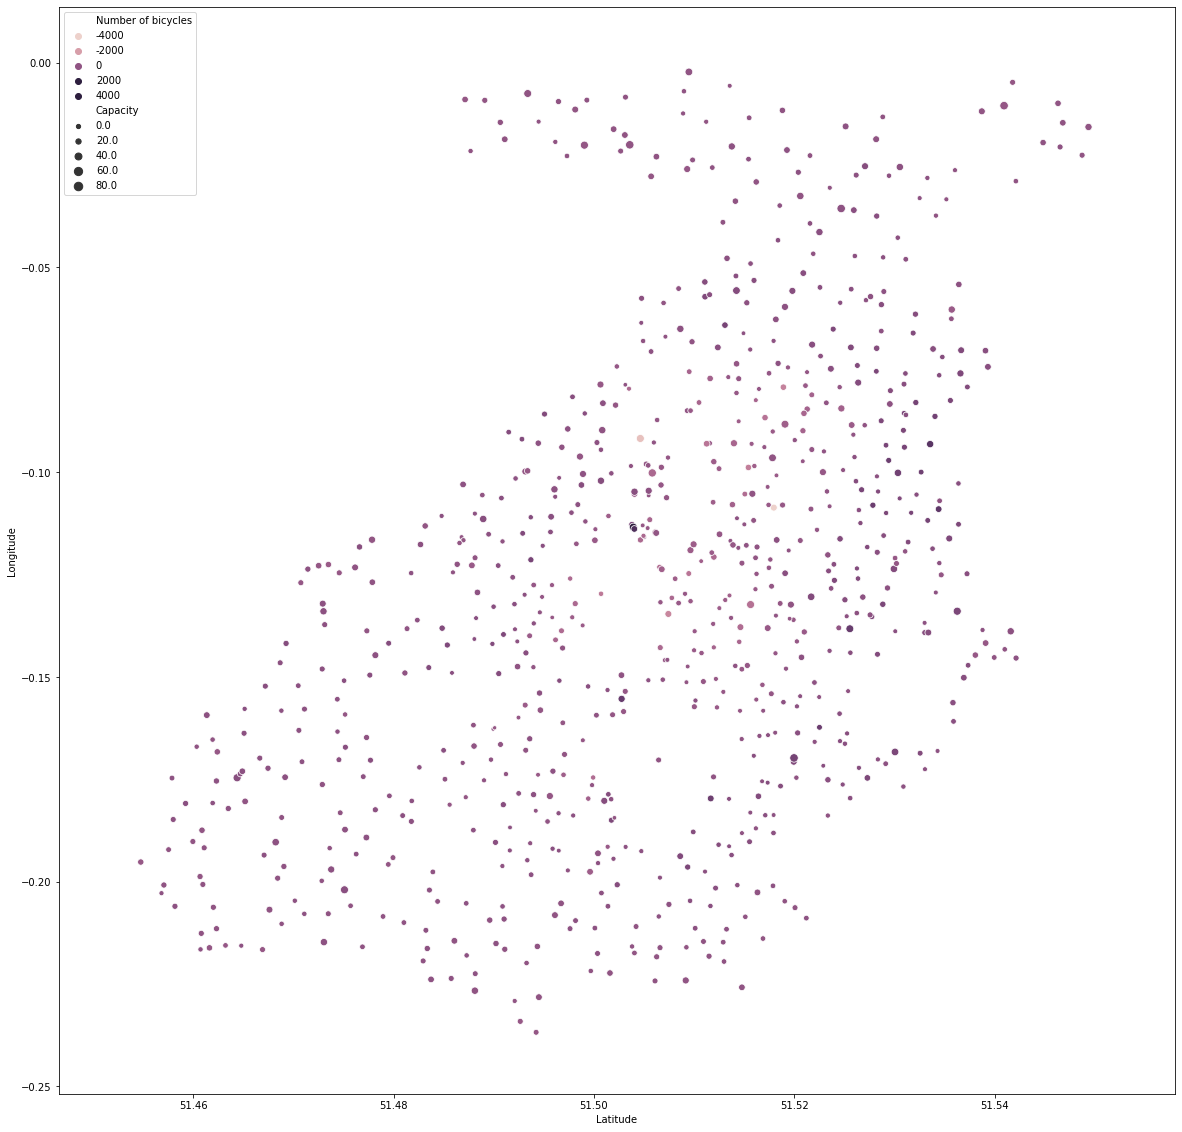

In [68]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = 'Latitude',y = 'Longitude',size = 'Capacity',hue = 'Number of bicycles', data = result)

- Capacity 와 나가고 들어오는 수 더한 값 비율 확인(각각 정규화)

- 나가고 들어오는 수 확인(2시그마 밖에 있는 정류장들은 어떤 정류장들인지) / 공통적으로 가지고 있는게 있는지